In [4]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
!pip install plotly


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 2.6 MB/s eta 0:00:08
   -- ------------------------------------- 1.0/19.1 MB 2.8 MB/s eta 0:00:07
   --- ------------------------------------ 1.6/19.1 MB 2.9 MB/s eta 0:00:06
   ---- ----------------------------------- 2.4/19.1 MB 2.8 MB/s eta 0:00:06
   ----- ---------------------------------- 2.6/19.1 MB 2.8 MB/s eta 0:00:06
   ------ --------------------------------- 3.1/19.1 MB 2.6 MB/s eta 0:00:07
   ------- -------------------------------- 3.7/19.1 MB 2.5 MB/s eta 0:00:07
   --------- ------------------------------ 4.5/19.1 MB 2.6 MB/s eta 0:00:06
   ----------- ---------------------------- 5.2/19.1 MB 2.7 MB/s eta 0:00:06
   ------------ --------------------------- 6.0/19.1 MB 2.9 MB/s eta 0:00:05
   -------------- ------------------------- 7.1/19.1 MB 3.0 MB/s eta 0:00:04
   ----------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
tesla=yf.Ticker("TSLA")

In [8]:
tesla_data=tesla.history(period="max")

In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).content


In [12]:
soup = BeautifulSoup(html_data, "html.parser")

In [13]:
tables = soup.find_all('table')
len(tables)

6

In [14]:
for index, tbl in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(tbl):
        tbl_index = index
print(tbl_index)

1


In [15]:
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

In [17]:
for row in tables[tbl_index].tbody.find_all("tr"):
    col = row.find_all('td')
    if (col != []):
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])], ignore_index=True)
tesla_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)


In [20]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [21]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [22]:
gme = yf.Ticker("GME")

In [23]:
gme_data=gme.history(period='max')

In [24]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [35]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url2).content

In [36]:
soup2 = BeautifulSoup(html_data_2, "html.parser")


In [46]:
tables_2 = soup2.find_all('table')
len(tables_2)


6

In [40]:
for index, tbl2 in enumerate(tables_2):
    if "GameStop Quarterly Revenue" in str(tbl2):
        tbl2_index = index
print(tbl2_index)

1


In [49]:
rows2 = tbl2.find_all('tr')

In [50]:
gme_revenue = pd.DataFrame(columns = ["Date", "Revenue"])


In [54]:
for row2 in tables_2[tbl2_index].tbody.find_all("tr"):
    col2 = row2.find_all('td')
    if (col2 != []):
        date = col2[0].text
        revenue = col2[1].text
        data.append({"Date": date, "Revenue": revenue})  
gme_revenue = pd.DataFrame(data)
gme_revenue.head()


,Date,Revenue
0,GameStop Revenue 2006-2020 | GME,
1,Macrotrends,
2,Source,
3,2020-04-30,"$1,021"
4,2020-01-31,"$2,194"


In [66]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$', "", regex=True)


In [67]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [64]:
gme_revenue.tail()

,Date,Revenue
122,2006-01-31,1667
123,2005-10-31,534
124,2005-07-31,416
125,2005-04-30,475
126,2005-01-31,709


C:\Users\anand\AppData\Local\Temp\ipykernel_22104\2468170499.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



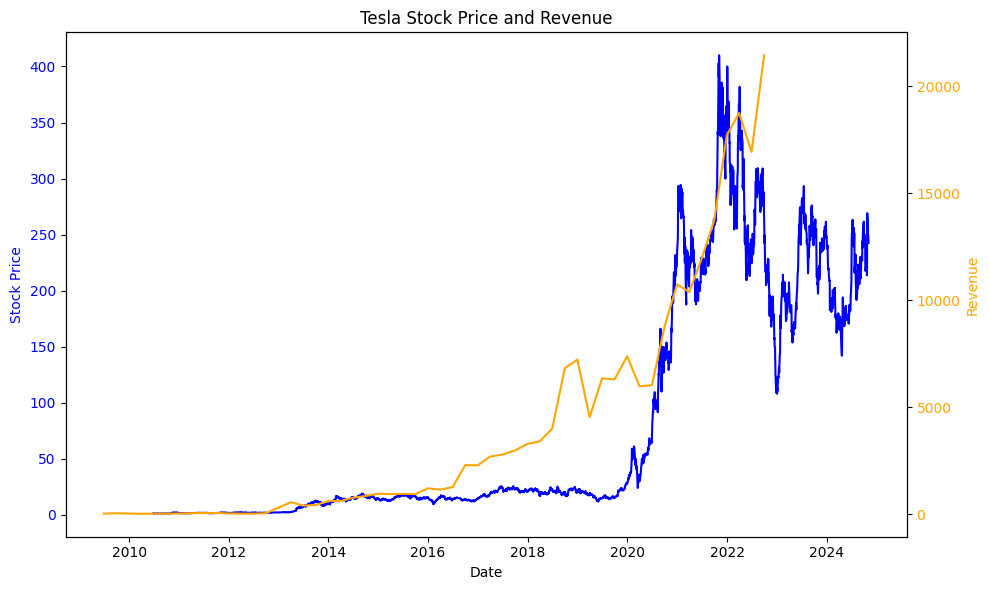

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='orange', label='Revenue')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Title and display adjustments
    plt.title(f'{title} Stock Price and Revenue')
    fig.tight_layout()
    plt.show()

# Run `make_graph` for Tesla data
make_graph(tesla_data, tesla_revenue, 'Tesla')

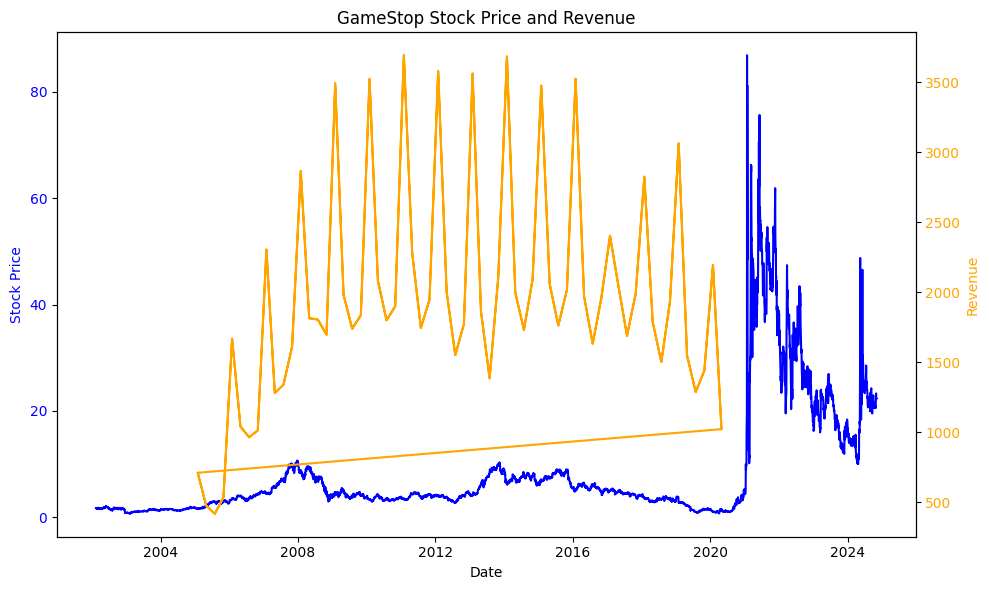

In [73]:
make_graph(gme_data, gme_revenue, 'GameStop')